In [7]:
from sklearn.datasets import make_regression
import numpy as np

In [9]:
X, y = make_regression(
    n_samples=4,       # Create 4 data points
    n_features=1,      # Each data point has 1 input feature
    n_informative=1,   # Only 1 feature actually affects the output
    n_targets=1,       # Predicting 1 output (standard regression)
    noise=80,          # Add randomness (noise) to make the data more realistic
    random_state=13    # Fix the randomness so result is reproducible
)

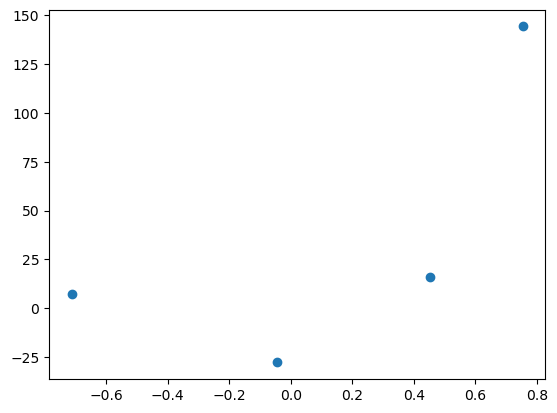

In [11]:
import matplotlib.pyplot as plt 
plt.scatter(X,y)

In [13]:
# Lets apply OLS ------------------------------> (Ordinary Least Square)

from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

reg.fit(X , y)

LinearRegression()

In [27]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [29]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [17]:
reg.coef_ # It will give the value of Slope -------------->

array([78.35063668])

In [19]:
reg.intercept_  # It will give b ------------------->

26.15963284313262

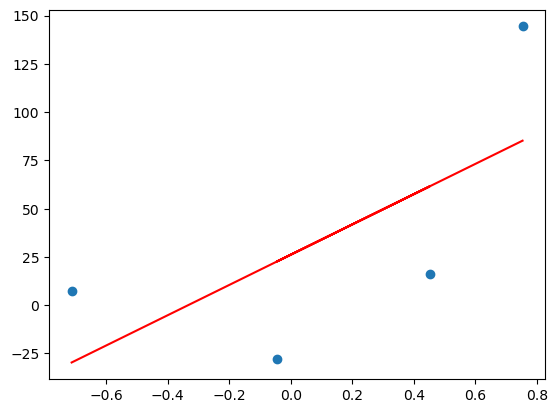

In [21]:
plt.scatter(X , y)

# It will plot the Best-fit line ------------------------------------------>
plt.plot(X , reg.predict(X) , color = 'red')

## Let's apply GRADIENT DESCENT assuming slope is conatant => m = 78.35
## and let's assume the starting value for intercept => b = 0

In [23]:
y_pred = ((78.35 * X) + 0).reshape(4)

In [25]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

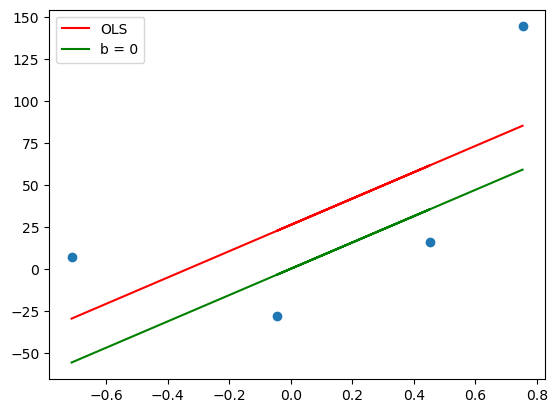

In [33]:
plt.scatter(X,y)
plt.plot(X , reg.predict(X), color ='red' , label = 'OLS')
plt.plot(X , y_pred, color ='green' , label = 'b = 0')

plt.legend()

plt.show()

In [60]:
m = 78.35
b = 0

# Iteration 1 -------------------------------------------------------->

loss_slope = -2 * np.sum( y - m * X.ravel() - b)

loss_slope

-209.27763408209216

## X.ravel() => Converts X into a 1D array (e.g., from [[1], [2], [3]] → [1, 2, 3]) 

In [48]:
# Let's take learning Rate ( lr ) = 0.1

lr = 0.1

step_size = loss_slope * lr
step_size

-20.927763408209216

In [66]:
# Calculate the new intercept ------------------------------------------------>
# here old b = 0 

b = b - step_size
b

20.927763408209216

In [56]:
y_pred1 = ((78.35 * X) + b).reshape(4)
y_pred1

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

In [68]:
b

20.927763408209216

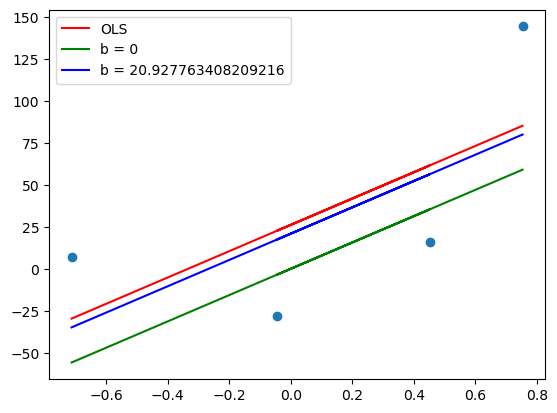

In [58]:
plt.scatter(X,y)
plt.plot(X , reg.predict(X), color ='red' , label = 'OLS')
plt.plot(X , y_pred, color ='green' , label = 'b = 0')
plt.plot(X , y_pred1, color ='blue' , label = 'b = {}'.format(b))

plt.legend()

plt.show()

In [70]:

# Iteration 2 ------------------------------------->
loss_slope = -2 * np.sum(  y - m * X.ravel() -b)
loss_slope

-41.85552681641843

In [72]:
step_size = loss_slope * lr
step_size

-4.185552681641844

In [74]:
b = b - step_size
b

25.11331608985106

In [76]:
y_pred2 = ((78.35 * X) + b).reshape(4)

y_pred2

array([-30.70249228,  60.51281283,  21.6264999 ,  84.17091186])

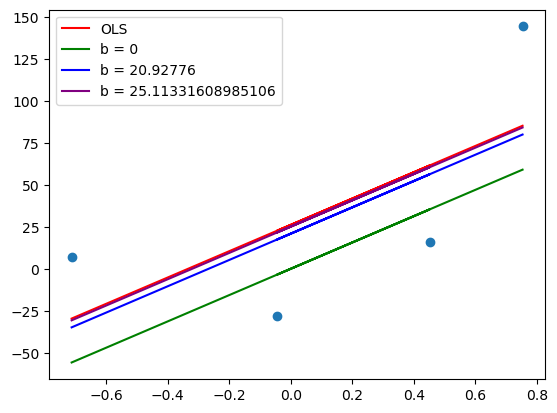

In [80]:
plt.scatter(X ,y)

plt.plot(X , reg.predict(X), color ='red' , label = 'OLS')
plt.plot(X , y_pred, color ='green' , label = 'b = 0')
plt.plot(X , y_pred1, color ='blue' , label = 'b = 20.92776')
plt.plot(X , y_pred2, color ='purple' , label = 'b = {}'.format(b))

plt.legend()

plt.show()

In [82]:
# Iteration 3 ------------------------------------------->

loss_slope = -2 * np.sum( y - m * X.ravel() - b)
loss_slope

-8.371105363283675

In [84]:
step_size = loss_slope * lr
step_size 

-0.8371105363283675

In [86]:
b = b - step_size
b

25.95042662617943

In [88]:
y_pred3 = ((78.35 * X) + b).reshape(4)

y_pred3

array([-29.86538175,  61.34992337,  22.46361044,  85.00802239])

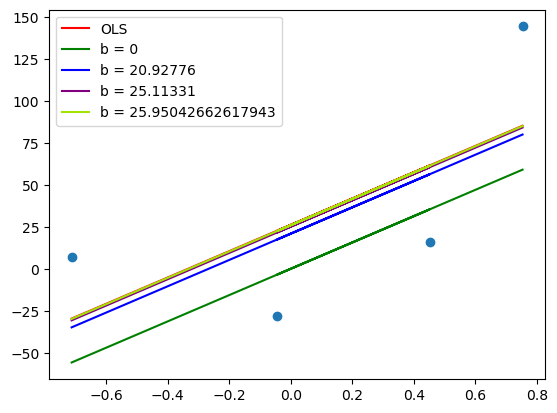

In [90]:
plt.scatter(X ,y)

plt.plot(X , reg.predict(X), color ='red' , label = 'OLS')
plt.plot(X , y_pred, color ='green' , label = 'b = 0')
plt.plot(X , y_pred1, color ='blue' , label = 'b = 20.92776')
plt.plot(X , y_pred2, color ='purple' , label = 'b = 25.11331')
plt.plot(X , y_pred3, color ='#A3E407' , label = 'b = {}'.format(b))

plt.legend()

plt.show()

## Now We Will Use LOOP ------------------------------------------->

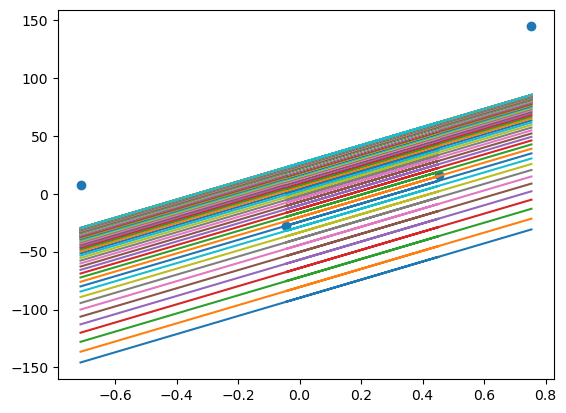

In [101]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    b = b - ( lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X , y_pred)

plt.scatter(X , y)